In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import norm
from scipy import linalg
import math
from sklearn.metrics import confusion_matrix
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from sklearn.linear_model import LogisticRegression

## Project

In [6]:
# Loading the data onto Jupyter Notebooks
data=pd.read_csv('heart.csv')

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Part (1)

#### Doing this just in case, we most probably will not need this:
#### Fit a multiple linear regression that uses all of the predictors (i.e. 13 predictors, plus an intercept).

In [9]:
# First make the multiple linear regression formula using a for loop iterating over each column name of interest
multiple_linear_formula = 'target ~ 1'
for column_name in data.columns[0:13]:
    multiple_linear_formula += ' + '
    multiple_linear_formula += column_name

multiple_linear_formula_model = ols(multiple_linear_formula, data).fit()

print(multiple_linear_formula_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     82.56
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.05e-148
Time:                        20:31:42   Log-Likelihood:                -372.81
No. Observations:                1025   AIC:                             773.6
Df Residuals:                    1011   BIC:                             842.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8793      0.158      5.569      0.0

#### What are the p-values of the slope for each of the predictors?

In [11]:
print("Slope P-value (age) = ", multiple_linear_formula_model.pvalues['age'])
print("Slope P-value (sex) = ", multiple_linear_formula_model.pvalues['sex'])
print("Slope P-value (cp) = ", multiple_linear_formula_model.pvalues['cp'])
print("Slope P-value (trestbps) = ", multiple_linear_formula_model.pvalues['trestbps'])
print("Slope P-value (chol) = ", multiple_linear_formula_model.pvalues['chol'])
print("Slope P-value (fbs) = ", multiple_linear_formula_model.pvalues['fbs'])
print("Slope P-value (restecg) = ", multiple_linear_formula_model.pvalues['restecg'])
print("Slope P-value (thalach) = ", multiple_linear_formula_model.pvalues['thalach'])
print("Slope P-value (exang) = ", multiple_linear_formula_model.pvalues['exang'])
print("Slope P-value (oldpeak) = ", multiple_linear_formula_model.pvalues['oldpeak'])
print("Slope P-value (slope) = ", multiple_linear_formula_model.pvalues['slope'])
print("Slope P-value (ca) = ", multiple_linear_formula_model.pvalues['ca'])
print("Slope P-value (thal) = ", multiple_linear_formula_model.pvalues['thal'])

Slope P-value (age) =  0.3221512583647957
Slope P-value (sex) =  5.40453434133898e-16
Slope P-value (cp) =  1.3816665867089788e-19
Slope P-value (trestbps) =  0.007247358492048582
Slope P-value (chol) =  0.04417283456733589
Slope P-value (fbs) =  0.8952365473887103
Slope P-value (restecg) =  0.0387385880041461
Slope P-value (thalach) =  2.2567672185829383e-06
Slope P-value (exang) =  1.9460966313309428e-07
Slope P-value (oldpeak) =  6.488874289297345e-07
Slope P-value (slope) =  0.0008275596976340993
Slope P-value (ca) =  6.016192715181328e-16
Slope P-value (thal) =  1.3223942387989103e-09


### Part 2
### Forward Subset Selection
#### Now writing a for loop to fit 13 separate linear models of the form, target ~ 1 + X1, where X1 is one of the predictors. For each fit, keep track of the mean squared error. (Note for this step we are not using cross-validation; just use the MSE for the training data.) Your code will look something like the pseudo-code below:
mse = []; # Initialize an empty array for mse <br>
P = 13; # Number of predictors <br>
for j in range(P): <br>
&nbsp;&nbsp;&nbsp;&nbsp; # Step 1: Fit the model to the data, using predictor j <br>
&nbsp;&nbsp;&nbsp;&nbsp; model = ... <br>
&nbsp;&nbsp;&nbsp;&nbsp; # Step 2: Find the predicted values using the current model <br>
&nbsp;&nbsp;&nbsp;&nbsp; yhat = ... <br>
&nbsp;&nbsp;&nbsp;&nbsp; # Step 3: Find the MSE for the current model and save <br>
&nbsp;&nbsp;&nbsp;&nbsp; mse.append( … ) <br>

In [100]:
mse_fss = [] # Initialize an empty array for mse
P = 13 # Number of predictors
predictor_number = []

for i in range(P):
    # Step 1: Fit the model to the data, using predictor
    formula = 'target ~ 1 + '
    formula += data.columns[i]
    model = ols(formula, data).fit()
    
    # Step 2: Find the predicted values using the current model
    prediction = model.predict()
    
    # Step 3: Find the MSE for the current model and save
    mse_fss.append(mean_squared_error(data['target'], prediction))
    predictor_number.append(i+1)

#### Make a plot showing MSE vs. feature number using the data from the previous section

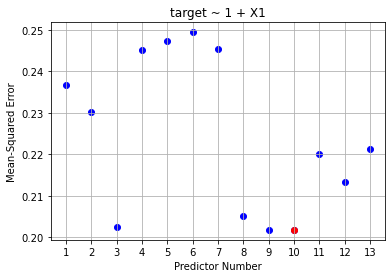

In [37]:
plt.scatter(predictor_number, mse_fss, marker='o', color='blue')
plt.title('target ~ 1 + X1')
plt.xlabel('Predictor Number')
plt.xticks(predictor_number)
plt.ylabel('Mean-Squared Error')

x = predictor_number[9]
y = mse_fss[9]
plt.scatter(x, y, marker='o', color='red')
plt.grid(True)

In [38]:
print(mse_fss)

[0.2366883316030918, 0.23030991494508754, 0.20258477965172628, 0.24501547388485556, 0.24732998530700892, 0.24940321634732804, 0.24530924363525017, 0.2051474047423509, 0.20189256232715783, 0.2018021909086209, 0.22000264757909097, 0.21335456427572386, 0.22131267657358838]


#### Using these results, which single feature gives the best prediction (lowest MSE)?

Predictor number 10, which is 'oldpeak', gives the best prediction (lowest mean-squared error).

### Part 3
#### Now write a loop to fit 12 models of the form, target ~ 1 + X1 + X2, where X1 is the best feature obtained from part (2) and X2 is one of the other features. Which combination of two features gives the best prediction?

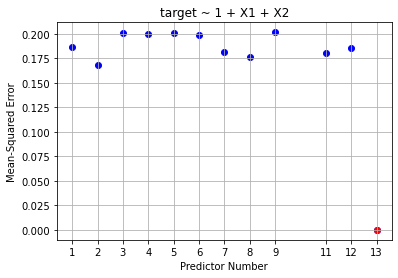

In [41]:
mse_fss2 = [] # Initialize an empty array for mse
P = 13 # Number of predictors
predictor_number = []

for i in range(P):
    if i == 9:
        continue
    else:
        # Step 1: Fit the model to the data, using predictor
        formula2 = 'target ~ 1 + oldpeak + '
        formula2 += data.columns[i+1]
        model2 = ols(formula2, data).fit()

        # Step 2: Find the predicted values using the current model
        prediction2 = model2.predict()

        # Step 3: Find the MSE for the current model and save
        mse_fss2.append(mean_squared_error(data['target'], prediction2))
        predictor_number.append(i+1)

plt.scatter(predictor_number, mse_fss2, marker='o', color='blue')
plt.title('target ~ 1 + X1 + X2')
plt.xlabel('Predictor Number')
plt.xticks(predictor_number)
plt.ylabel('Mean-Squared Error')

x2 = predictor_number[11]
y2 = mse_fss2[11]
plt.scatter(x2, y2, marker='o', color='red')
plt.grid(True)

#### Using these results, which single feature gives the best prediction (lowest MSE)?

Predictor number 10+13, which is 'oldpeak + thal' (thal = thalassemia), gives the best prediction (lowest mean-squared error).

### Part 4
#### Now write a loop to fit 11 models of the form, target ~ 1 + X1 + X2 + X3, where X1 is the best feature obtained from part (2), X2 is the best feature obtained from part (3), and X3 is one of the other features. Which combination of three features gives the best prediction?

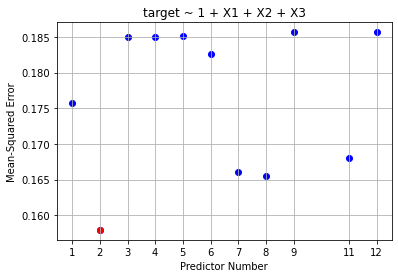

In [43]:
mse_fss3 = [] # Initialize an empty array for mse
P = 13 # Number of predictors
predictor_number = []

for i in range(P):
    if i == 9 or i == 12:
        continue
    else:
        # Step 1: Fit the model to the data, using predictor
        formula3 = 'target ~ 1 + oldpeak + thal +'
        formula3 += data.columns[i+1]
        model3 = ols(formula3, data).fit()

        # Step 2: Find the predicted values using the current model
        prediction3 = model3.predict()

        # Step 3: Find the MSE for the current model and save
        mse_fss3.append(mean_squared_error(data['target'], prediction3))
        predictor_number.append(i+1)


plt.scatter(predictor_number, mse_fss3, marker='o', color='blue')
plt.title('target ~ 1 + X1 + X2 + X3')
plt.xlabel('Predictor Number')
plt.xticks(predictor_number)
plt.ylabel('Mean-Squared Error')

x3 = predictor_number[1]
y3 = mse_fss3[1]
plt.scatter(x3, y3, marker='o', color='red')
plt.grid(True)

#### Using these results, which single feature gives the best prediction (lowest MSE)?

Predictor number 10+13+2, which is 'oldpeak + thal + sex' (thal = thalassemia), gives the best prediction (lowest mean-squared error).

### Part 5
#### Now write a loop to fit 10 models of the form, target ~ 1 + X1 + X2 + X3 + X4, where X1 is the best feature obtained from part (2), X2 is the best feature obtained from part (3), X3 is the best feature obtained from part (4), and X4 is one of the other features. Which combination of three features gives the best prediction?

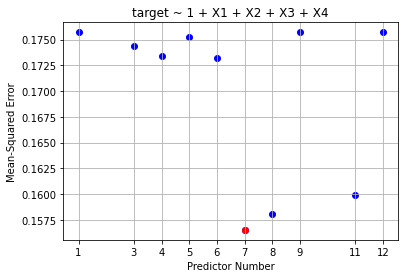

In [49]:
mse_fss4 = [] # Initialize an empty array for mse
P = 13 # Number of predictors
predictor_number = []

for i in range(P):
    if i == 9 or i == 12 or i == 1:
        continue
    else:
        # Step 1: Fit the model to the data, using predictor
        formula4 = 'target ~ 1 + oldpeak + thal + sex + '
        formula4 += data.columns[i+1]
        model4 = ols(formula4, data).fit()

        # Step 2: Find the predicted values using the current model
        prediction4 = model4.predict()

        # Step 3: Find the MSE for the current model and save
        mse_fss4.append(mean_squared_error(data['target'], prediction4))
        predictor_number.append(i+1)
    
plt.scatter(predictor_number, mse_fss4, marker='o', color='blue')
plt.title('target ~ 1 + X1 + X2 + X3 + X4')
plt.xlabel('Predictor Number')
plt.xticks(predictor_number)
plt.ylabel('Mean-Squared Error')

x4 = predictor_number[5]
y4 = mse_fss4[5]
plt.scatter(x4, y4, marker='o', color='red')
plt.grid(True)

#### Using these results, which single feature gives the best prediction (lowest MSE)?

Predictor number 10+13+2+7, which is 'oldpeak + thal + sex + restecg' (thal = thalassemia), gives the best prediction (lowest mean-squared error).

### Part 6
#### Now write a loop to fit 9 models of the form, target ~ 1 + X1 + X2 + X3 + X4 + X5, where X1 is the best feature obtained from part (2), X2 is the best feature obtained from part (3), X3 is the best feature obtained from part (4), X4 is the best feature obtained from part (5), and X5 is one of the other features. Which combination of three features gives the best prediction?

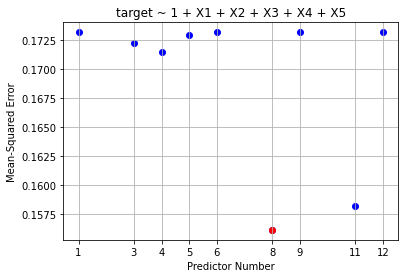

In [53]:
mse_fss5 = [] # Initialize an empty array for mse
P = 13 # Number of predictors
predictor_number = []

for i in range(P):
    if i == 9 or i == 12 or i == 1 or i == 6:
        continue
    else:
        # Step 1: Fit the model to the data, using predictor
        formula5 = 'target ~ 1 + oldpeak + thal + sex + restecg + '
        formula5 += data.columns[i+1]
        model5 = ols(formula5, data).fit()

        # Step 2: Find the predicted values using the current model
        prediction5 = model5.predict()

        # Step 3: Find the MSE for the current model and save
        mse_fss5.append(mean_squared_error(data['target'], prediction5))
        predictor_number.append(i+1)
    
plt.scatter(predictor_number, mse_fss5, marker='o', color='blue')
plt.title('target ~ 1 + X1 + X2 + X3 + X4 + X5')
plt.xlabel('Predictor Number')
plt.xticks(predictor_number)
plt.ylabel('Mean-Squared Error')

x5 = predictor_number[5]
y5 = mse_fss5[5]
plt.scatter(x5, y5, marker='o', color='red')
plt.grid(True)

#### Using these results, which single feature gives the best prediction (lowest MSE)?

Predictor number 10+13+2+7+8, which is 'oldpeak + thal + sex + restecg + thalach' (thal = thalassemia), gives the best prediction (lowest mean-squared error).

### Part 7
### LASSO
#### Find the LASSO Logistic Regression Model and report which predictors were set to 0

In [88]:
x = data.drop(columns = ['target'])
y = data['target']
model_lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.05).fit(x,y)


model_lasso.coef_

array([[ 0.00100977, -0.86564109,  0.64188914, -0.01335932, -0.00376753,
         0.        ,  0.        ,  0.03131424, -0.25877563, -0.52718165,
         0.04819083, -0.51875914, -0.48889636]])

The 6th (fbs) and 7th (restecg) predictors were set to 0.

### Part 8
#### Perform 5-fold cross-validation for the 2 models from Forward Subset Selection and Lasso. Report the mean test set MSE for each of these 4 models. Which model has the lowest test MSE?

In [106]:
data_part7 = data.copy()

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(data_part7)

mse_model_fss = []
mse_model_lasso = []
mse_multiple_linear_regression = []

P = 13 # Number of predictors

for train_index, test_index in kf.split(data_part7):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data_part7.iloc[list(train_index),:], data_part7.iloc[list(test_index),:]
    
    ### 1. Forward Subset Selection model: ###
    # Step 1: Fit the model to the training data, using predictor
    formula_fss = 'target ~ 1 + oldpeak + thal + sex + restecg + thalach'
    model_fss = ols(formula_fss, data_train).fit()

    # Step 2: Find the predicted values of the training set using the current model
    prediction_fss = model_fss.predict(data_test)

    # Step 3: Find the MSE for the current model and save
    mse_model_fss.append(mean_squared_error(data_test['target'], prediction_fss))
    
    ### 2. LASSO model: ###
    # Step 1: Fit the model to the training data, using predictor
    x = data_train.drop(columns = ['target'])
    y = data_train['target']
    model_lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.05).fit(x,y)

    # Step 2: Find the predicted values of the training set using the current model
    prediction_lasso = model_lasso.predict(data_test.drop(columns = ['target']))

    # Step 3: Find the MSE for the current model and save
    mse_model_lasso.append(mean_squared_error(data_test['target'], prediction_lasso))
    
    ### 3. Multiple Linear Regression model: ###
    # Step 1: Fit the model to the training data, using predictor
    multiple_linear_formula = 'target ~ 1'
    for column_name in data.columns[0:13]:
        multiple_linear_formula += ' + '
        multiple_linear_formula += column_name

    multiple_linear_formula_model = ols(multiple_linear_formula, data_train).fit()

    # Step 2: Find the predicted values of the training set using the current model
    prediction_multiple_linear = multiple_linear_formula_model.predict(data_test)

    # Step 3: Find the MSE for the current model and save
    mse_multiple_linear_regression.append(mean_squared_error(data_test['target'], prediction_multiple_linear))

### Part 9
#### Report the Average Mean Squared Error of each model. Plot the Average Mean Squared Error's of each model.

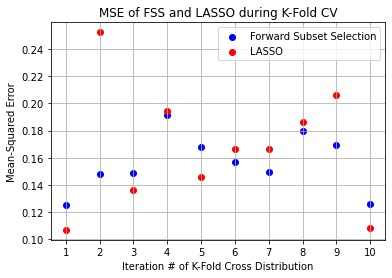

In [110]:
plt.scatter(range(1,10+1), mse_model_fss, marker='o', color='blue', label='Forward Subset Selection')
plt.scatter(range(1,10+1), mse_model_lasso, marker='o', color='red', label='LASSO')
plt.title('MSE of FSS and LASSO during K-Fold CV')
plt.xlabel('Iteration # of K-Fold Cross Distribution')
plt.xticks(range(1,10+1))
plt.ylabel('Mean-Squared Error')
plt.legend()
plt.grid()

In [111]:
print("Average MSE Forward Subset Selection = ", sum(mse_model_fss)/10)
print("Average MSE LASSO = ", sum(mse_model_lasso)/10)

Average MSE Forward Subset Selection =  0.15622165870740481
Average MSE LASSO =  0.1668284789644013


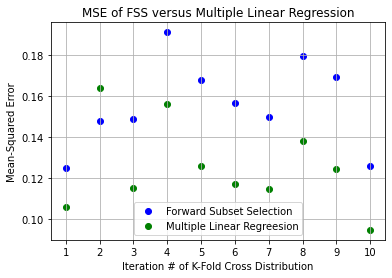

In [114]:
plt.scatter(range(1,10+1), mse_model_fss, marker='o', color='blue', label='Forward Subset Selection')
plt.scatter(range(1,10+1), mse_multiple_linear_regression, marker='o', color='green', label='Multiple Linear Regreesion')
plt.title('MSE of FSS versus Multiple Linear Regression')
plt.xlabel('Iteration # of K-Fold Cross Distribution')
plt.xticks(range(1,10+1))
plt.ylabel('Mean-Squared Error')
plt.legend()
plt.grid()

In [113]:
print("Average MSE Forward Subset Selection = ", sum(mse_model_fss)/10)
print("Average MSE Multiple Linear Regression = ", sum(mse_multiple_linear_regression)/10)

Average MSE Forward Subset Selection =  0.15622165870740481
Average MSE Multiple Linear Regression =  0.1254837896463044


In [119]:
model_fss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     107.3
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.29e-89
Time:                        01:57:53   Log-Likelihood:                -457.27
No. Observations:                 923   AIC:                             926.5
Df Residuals:                     917   BIC:                             955.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1861      0.110      1.693      0.091      -0.030       0.402
oldpeak       -0.1186      0.012     -9.864      0.000      -0.142      -0.095
thal          -0.1668      0.022     -7.702      0.000      -0.209      -0.124
sex           -0.2083      0.029     -7.174      0.000      -0.265      -0.151
restecg        0.0775      0.025      3.121      0.002       0.029       0.126
thalach        0.0063      0.001     10.370      0.000       0.005       0.007
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.614
Skew:                          -0.220   Prob(JB):                     1.23e-05
Kurtosis:                       2.373   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
model_fss.pvalues

Intercept    9.084342e-02
oldpeak      6.985826e-22
thal         3.468806e-14
sex          1.505986e-12
restecg      1.859839e-03
thalach      6.691161e-24
dtype: float64